In [1]:
!pip install tensorflow keras scikit-learn matplotlib seaborn pillow requests
!pip install openai huggingface_hub

['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']
Number of classes: 15


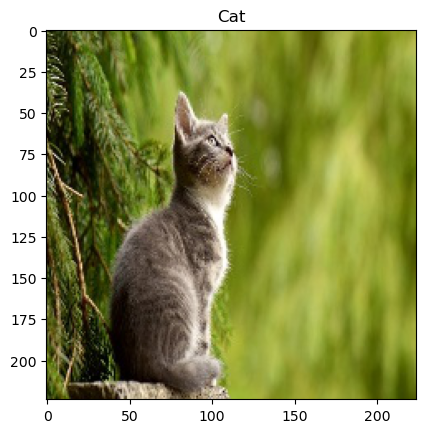

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base_path = '/Users/sachinbhat/Desktop/Internship Projects/Animal Classification/dataset'

classes = [folder for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]
print(sorted(classes))
print(f"Number of classes: {len(classes)}")

# Visualize some random images
for cls in classes:
    img_path = os.path.join(base_path, cls, os.listdir(os.path.join(base_path, cls))[0])
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(cls)
    plt.show()
    break


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False   # <- IMPORTANT
)

Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.


In [14]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

# Set input shape and number of classes
input_shape = (224, 224, 3)
num_classes = len(train_generator.class_indices)


base_model = MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model initially

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)


loss_fn = CategoricalCrossentropy





In [15]:

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=loss_fn,
    metrics=['accuracy']
)

In [21]:

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)


history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stop]
)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 647ms/step - accuracy: 0.9787 - loss: 0.0962 - val_accuracy: 0.9060 - val_loss: 0.3137
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 839ms/step - accuracy: 0.9826 - loss: 0.0812 - val_accuracy: 0.9060 - val_loss: 0.3136
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 844ms/step - accuracy: 0.9805 - loss: 0.0905 - val_accuracy: 0.9008 - val_loss: 0.3140
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 818ms/step - accuracy: 0.9735 - loss: 0.1104 - val_accuracy: 0.9060 - val_loss: 0.3146
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 44s 901ms/step - accuracy: 0.9794 - loss: 0.0865 - val_accuracy: 0.9034 - val_loss: 0.3149
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 721ms/step - accuracy: 0.9841 - loss: 0.0889 - val_accuracy: 0.9060 - val_loss: 0.3127
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 792ms/step - accuracy: 0.9776 - loss: 0.1049 - val_accuracy: 0.9060 - val_loss: 0.3136
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9818 - loss: 0.0890 - val_accurac

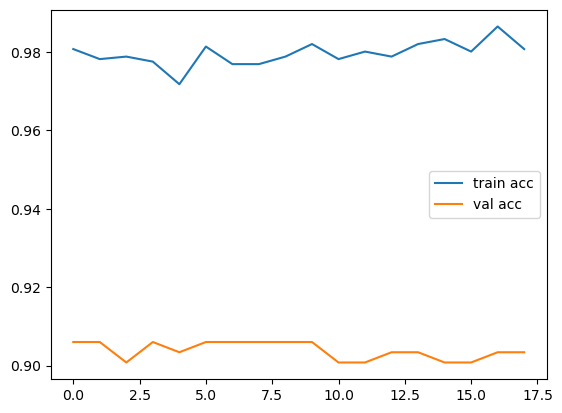

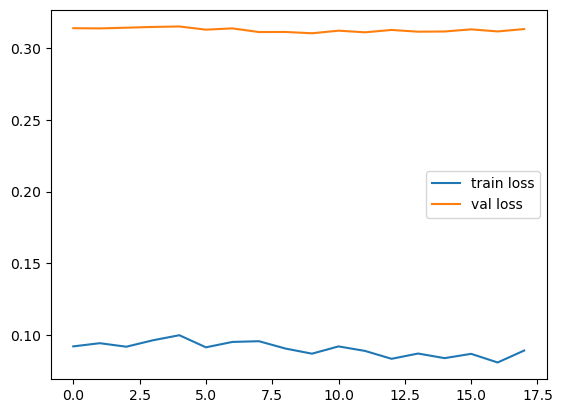

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


In [9]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(val_generator.classes, y_pred, target_names=classes))



12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 285ms/step
Classification Report
              precision    recall  f1-score   support

         Cat       0.88      0.92      0.90        25
         Dog       0.96      0.93      0.94        27
     Dolphin       0.92      1.00      0.96        24
     Giraffe       0.73      0.85      0.79        26
        Bear       0.81      0.88      0.85        25
       Zebra       0.95      0.75      0.84        24
       Panda       0.83      0.96      0.89        25
       Tiger       1.00      0.85      0.92        26
        Bird       0.96      0.96      0.96        25
    Kangaroo       0.92      0.88      0.90        26
       Horse       0.89      0.96      0.92        25
         Cow       0.85      0.85      0.85        26
        Deer       0.96      0.96      0.96        27
        Lion       1.00      0.88      0.94        25
    Elephant       1.00      0.96      0.98        27

    accuracy                           0.91       383
   macro avg     

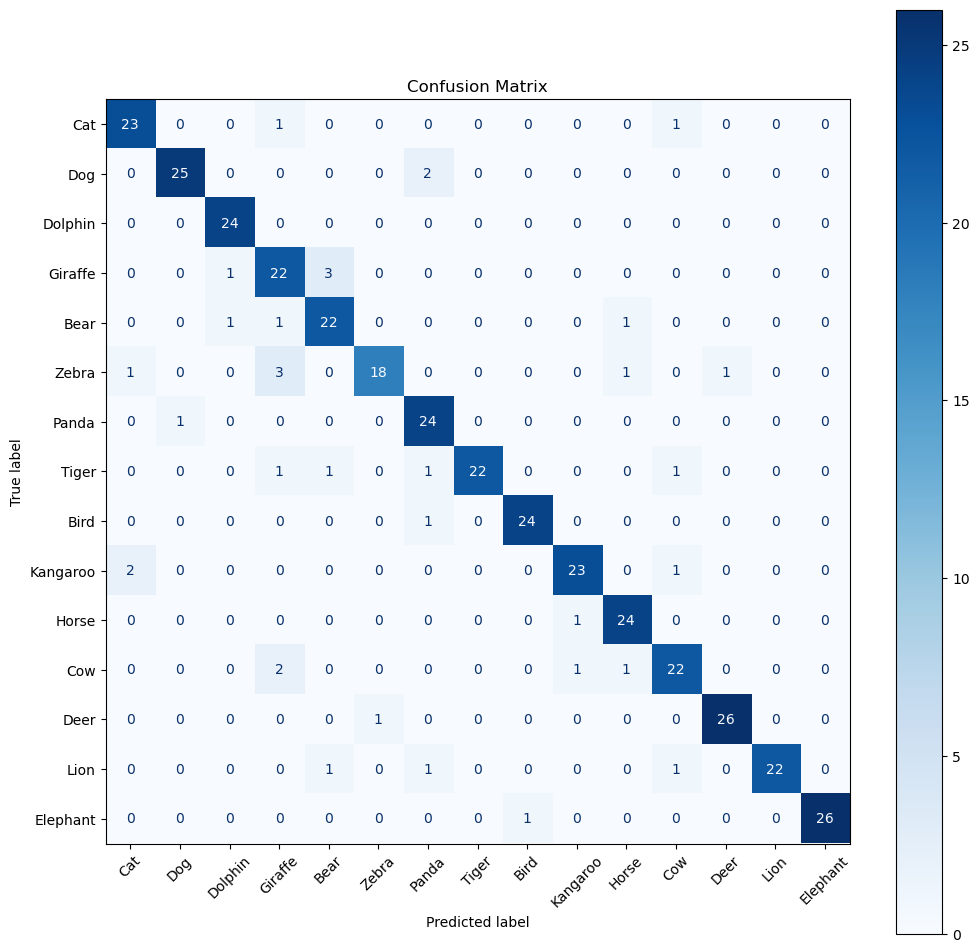

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Generate confusion matrix
cm = confusion_matrix(val_generator.classes, y_pred)

# 2. Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# 3. Plot it
fig, ax = plt.subplots(figsize=(12,12))  # Increase size if you have many classes
disp.plot(cmap='Blues', ax=ax)
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()
